In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [90]:
test = pd.read_csv('C:/Users/user/github/Data/aifactory/test_data.csv')
train = pd.read_csv('C:/Users/user/github/Data/aifactory/train_data.csv')

In [91]:
test.drop('out_pressure',axis=1, inplace=True)
train.drop('out_pressure',axis=1, inplace=True)

In [92]:
tr = train.drop('type', axis=1)
te = test.drop('type', axis=1)

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [94]:
scaler = StandardScaler()

In [95]:
scaler.fit(tr)

StandardScaler()

In [96]:
sc_tr = scaler.fit_transform(tr)

In [97]:
sc_te = scaler.fit_transform(te)

In [98]:
pca = PCA(n_components=2)

In [99]:
pca.fit(sc_tr)

PCA(n_components=2)

In [100]:
pca_result_te = pca.transform(sc_te)

In [101]:
threshold = np.percentile(pca_result_te,95)

In [102]:
pca_result_tr = pca.transform(sc_tr)

In [103]:
kk = sc_te[(pca.transform(sc_te) > threshold).any(axis=1)]

In [104]:
result = pd.DataFrame(sc_te).loc[(pca.transform(sc_te) > threshold).any(axis=1)].index

In [105]:
result

Int64Index([  24,   41,   42,   71,   79,   87,   89,   91,  105,  106,
            ...
            7217, 7224, 7247, 7255, 7268, 7284, 7298, 7308, 7355, 7356],
           dtype='int64', length=730)

In [106]:
from sklearn.cluster import DBSCAN

In [107]:
dbscan = DBSCAN(eps=0.1, min_samples=20)

In [108]:
dbscan.fit(pca_result_tr)

DBSCAN(eps=0.1, min_samples=20)

In [109]:
result = dbscan.fit_predict(pca_result_te)

In [110]:
total_result = pd.DataFrame(pca_result_te)

In [111]:
total_result['dbscan'] = result

In [112]:
total_result.columns = ['x','y','dbscan']

In [113]:
total_result

,x,y,dbscan
0,0.982258,-0.030545,0
1,1.430936,-0.045796,0
2,-1.421679,0.071117,0
3,0.041716,0.013658,0
4,-0.387521,0.024709,0
...,...,...,...
7384,-0.203263,0.021552,0
7385,-2.134210,0.097953,0
7386,-1.905520,0.096973,0
7387,-1.820633,0.085979,0


<AxesSubplot: xlabel='x', ylabel='y'>

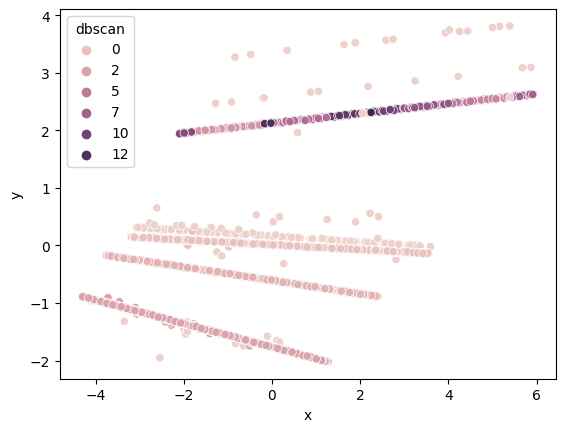

In [114]:
sns.scatterplot(data = total_result, x = 'x', y = 'y', hue = 'dbscan')

In [115]:
total_result.dbscan.value_counts()

 0     3993
 1     1108
 2     1088
-1      328
 3      185
 6      148
 8      131
 11      78
 4       72
 7       65
 10      62
 5       58
 9       30
 12      21
 13      21
 14       1
Name: dbscan, dtype: int64